## Моделирование механических систем
1. (A) Закреплённый пружинами груз (без учёта трения).
2. (A) Закреплённый пружинами груз (с учётом трения).
3. (C) Закреплённый пружинами груз на движущейся ленте (автоколебания).
4. (B) Физический маятник.
5. (B) Маятник с трением.
6. (C) Маятник Фроуда (маятник на вращающемся валу, автоколебания).


In [1]:
import sympy as sp
from scipy.integrate import odeint 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ODEplot import *

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', context='notebook', palette=tuple(colors), 
        rc={'axes.labelsize': 16})

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
sp.init_printing()

### (A) Закреплённый пружинами груз (без учёта трения).

In [2]:
y = sp.symbols('y', cls=sp.Function)
t = sp.symbols('t')

In [3]:
k1 = 10
k2 = 4
m = 12

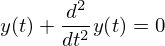

In [4]:
model = sp.Eq(y(t).diff(t,2) + y(t))
model

In [5]:
ics = {
    y(0) : 5,
    y(t).diff(t).subs(t,0) : 1,
}

In [6]:
soln = sp.dsolve(model, y(t), ics=ics)
soln

In [7]:
def harmonic(yz, t):
    """Right hand side of ODEs for simple harmonic motion"""
    y,z = yz
    return np.array([z, -y])


#Solve
init_cond = np.array([1, 2]) # x'(0)=1 and y'(0)=2
init_cond_1 = np.array([2, 3]) # x'(0)=2 and y'(0)=3
t = np.linspace(0,30,200)
yz = odeint(harmonic, init_cond, t)#, args = args)

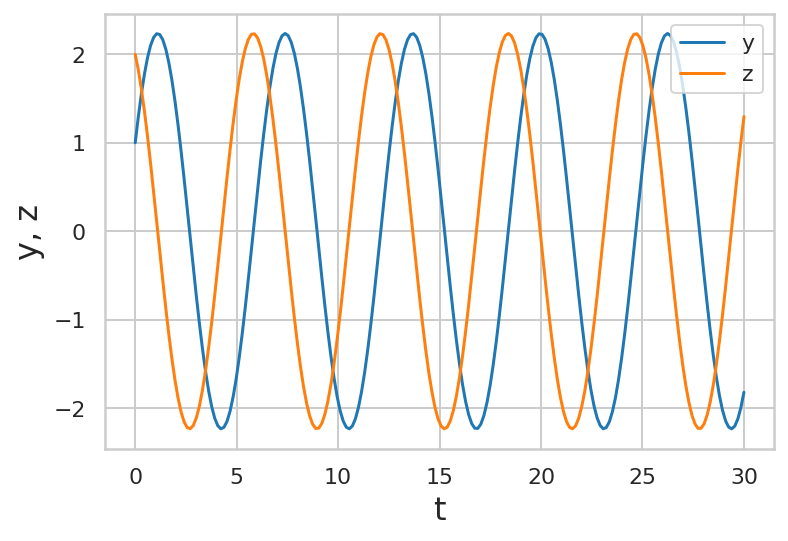

In [8]:
# Plot
plt.plot(t, yz)
plt.xlabel('t')
plt.ylabel('y, z')
plt.legend(('y', 'z'));

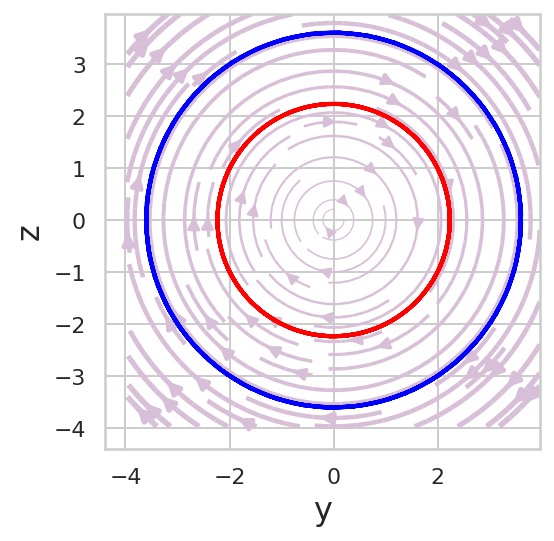

In [9]:
#Phase plane
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_aspect('equal')

ax = plot_traj(ax,harmonic, init_cond, t,  color = 'red')
ax = plot_traj(ax,harmonic, init_cond_1, t,  color = 'blue')
ax = plot_flow_field(ax, harmonic, ax.get_xlim(), ax.get_ylim())

### (A) Закреплённый пружинами груз (с учётом трения).

In [10]:
y = sp.symbols('y', cls=sp.Function)
t,e = sp.symbols('t,ε')

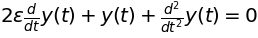

In [11]:
model = sp.Eq(y(t).diff(t,2) + 2*e*y(t).diff(t)+y(t))
model

In [12]:
e = 0.04
ics = {
    y(0) : 5,
    y(t).diff(t).subs(t,0) : 1,
}

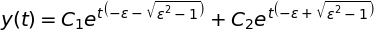

In [13]:
soln = sp.dsolve(model, y(t))
soln

In [14]:
def harmonic_modified(yz, t, eps):
    """Right hand side of ODEs for simple harmonic motion"""
    y,z = yz
    return np.array([z, -y-2*e*z])

#epsilon argument
eps = 1
args = (eps,)

#Solve
init_cond = np.array([1, 2]) # x'(0)=1 and y'(0)=2
init_cond_1 = np.array([2, 3]) # x'(0)=2 and y'(0)=3
t = np.linspace(0,30,200)
yz = odeint(harmonic_modified, init_cond, t, args = args)

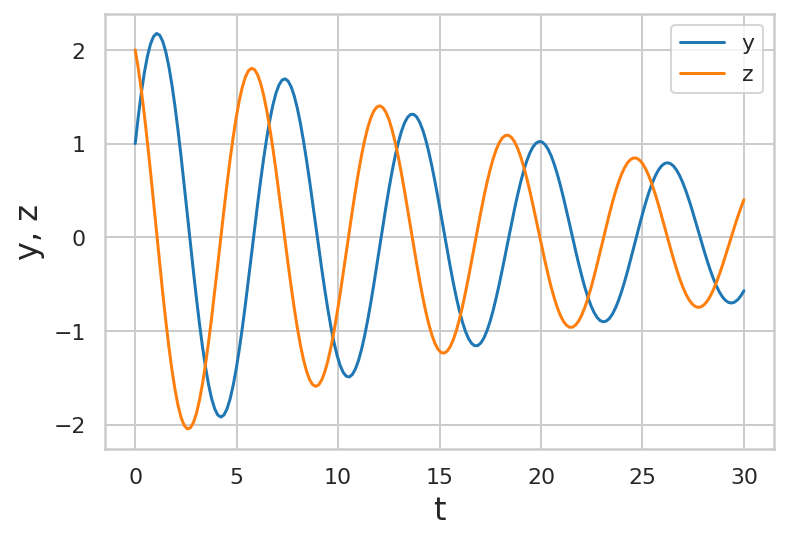

In [15]:
# Plot
plt.plot(t, yz)
plt.xlabel('t')
plt.ylabel('y, z')
plt.legend(('y', 'z'));

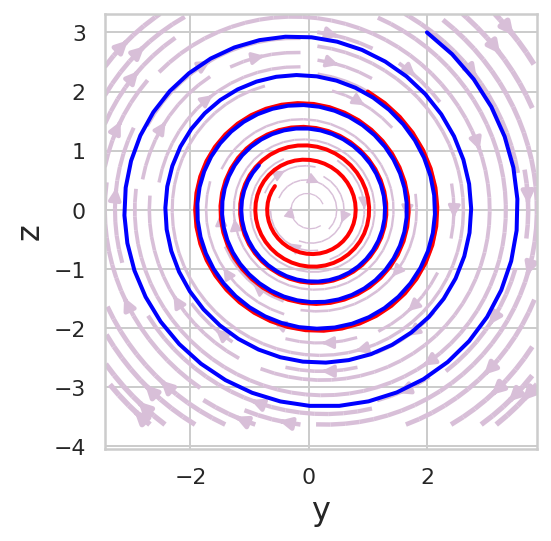

In [16]:
#Phase plane
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_aspect('equal')

ax = plot_traj(ax,harmonic_modified, init_cond, t, args = args, color = 'red')
ax = plot_traj(ax,harmonic_modified, init_cond_1, t, args = args, color = 'blue')
ax = plot_flow_field(ax, harmonic_modified, ax.get_xlim(), ax.get_ylim(), args=args)

### (C) Закреплённый пружинами груз на движущейся ленте (автоколебания).

In [17]:
y = sp.symbols('y', cls=sp.Function)
t,e,p,gamma = sp.symbols('t,ε,p,ɣ')

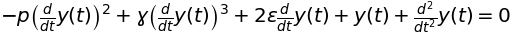

In [18]:
model = sp.Eq(y(t).diff(t,2) + 2*e*y(t).diff(t)+y(t)-p*y(t).diff(t)**2 + gamma*y(t).diff(t)**3)
model

In [19]:
ics = {
    y(0) : 5,
    y(t).diff(t).subs(t,0) : 1,
}

In [20]:
def harmonic_heavy_modified(yz, t, eps,p,gamma):
    """Right hand side of ODEs for simple harmonic motion"""
    y,z = yz
    return np.array([z, -y-2*eps*z + p*z**2 - gamma * z**3])

#epsilon argument
eps = -0.2
p = 0.1
gamma = 3
args = (eps,p,gamma,)

#Solve
init_cond = np.array([1, 2]) # x'(0)=1 and y'(0)=2
init_cond_1 = np.array([0.002, 0.003]) # x'(0)=2 and y'(0)=3
t = np.linspace(0,60,200)
yz = odeint(harmonic_heavy_modified, init_cond, t, args = args)

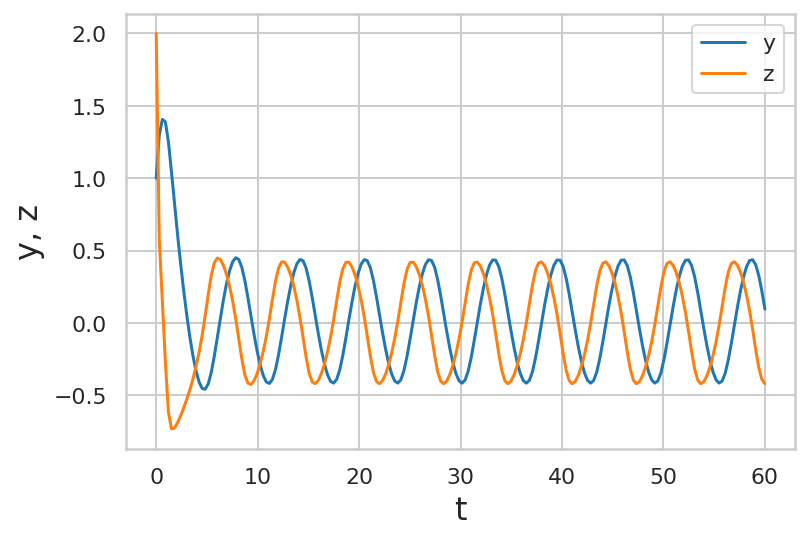

In [21]:
# Plot
plt.plot(t, yz)
plt.xlabel('t')
plt.ylabel('y, z')
plt.legend(('y', 'z'));

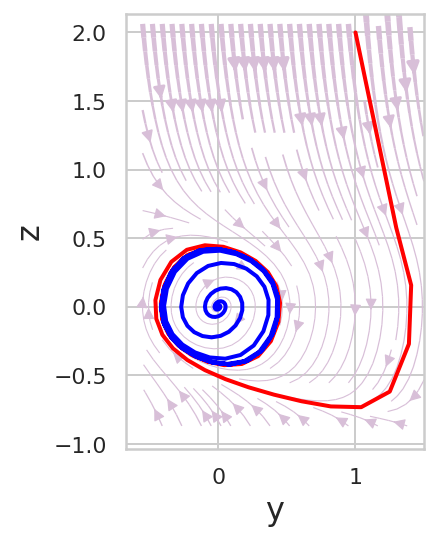

In [22]:
#Phase plane
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_aspect('equal')

ax = plot_traj(ax,harmonic_heavy_modified, init_cond, t, args = args, color = 'red')
ax = plot_traj(ax,harmonic_heavy_modified, init_cond_1, t, args = args, color = 'blue')
ax = plot_flow_field(ax, harmonic_heavy_modified, ax.get_xlim(), ax.get_ylim(), args=args)

### (B) Физический маятник.

In [23]:
psi = sp.symbols('ψ', cls=sp.Function)
t,omega = sp.symbols('t,ω')

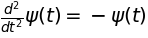

In [24]:
omega = 2
ics = {
    psi(0) : 1,
    psi(t).diff(t).subs(t,0) : 2
}
model = sp.Eq(psi(t).diff(t,2), -psi(t)) # omega**2
model

In [25]:
soln = sp.dsolve(model, psi(t), ics=ics)
soln

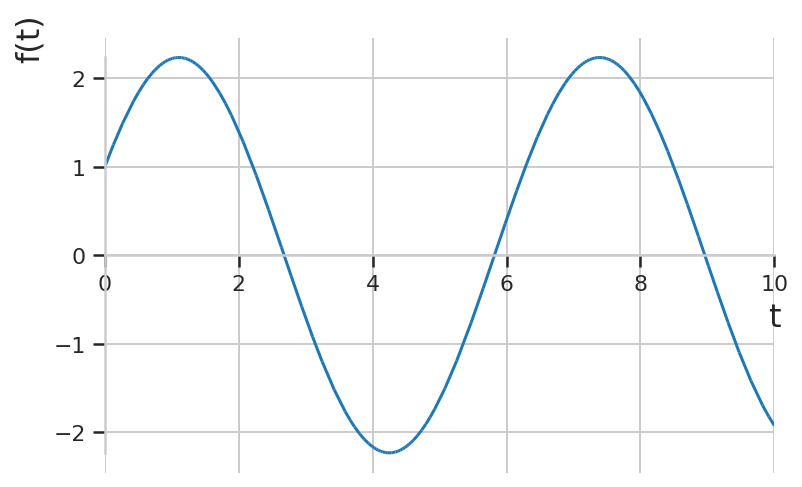

In [26]:
sp.plot(soln.rhs, (t,0,10))

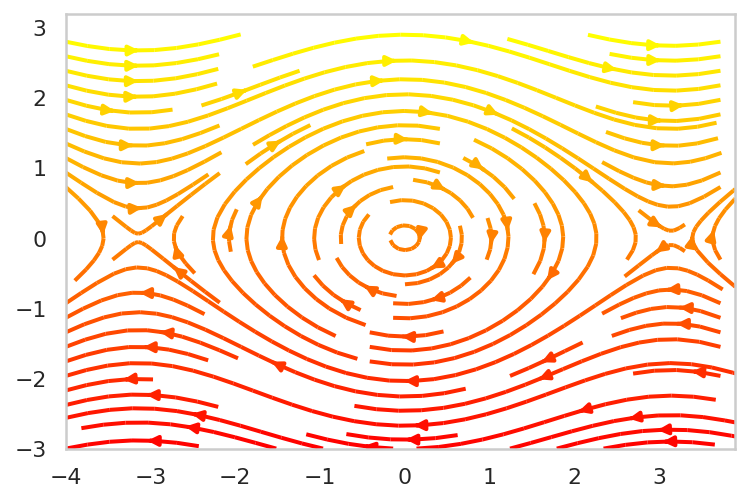

In [3]:
xvalues, yvalues = np.meshgrid(np.arange(-4, 4, 0.1), np.arange(-3, 3, 0.1))
psidot = yvalues
vdot = -np.sin(xvalues)
plt.streamplot(xvalues, yvalues, psidot, vdot, color=psidot, linewidth=2, cmap='autumn')
plt.grid(); plt.show()

### (B) Маятник с трением.

In [6]:
psi = sp.symbols('ψ', cls=sp.Function)
t,eps = sp.symbols('t,ε')

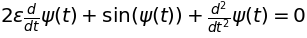

In [7]:
model = sp.Eq(psi(t).diff(t,2) + 2*eps*psi(t).diff(t) + sp.sin(psi(t)))
model

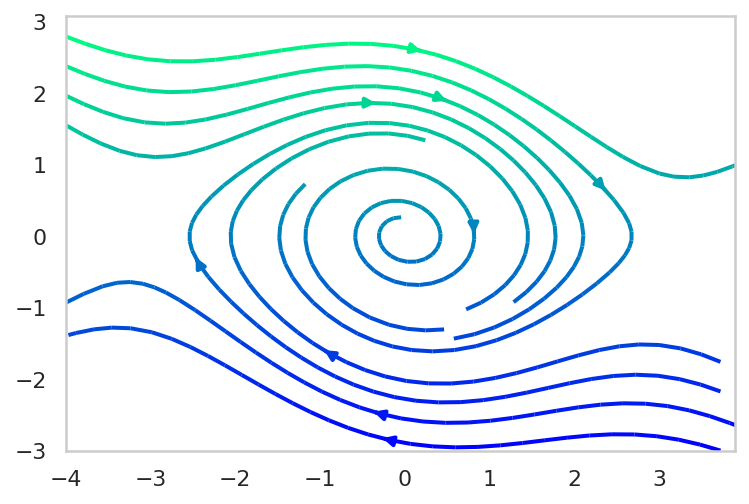

In [17]:
xvalues, yvalues = np.meshgrid(np.arange(-4, 4, 0.1), np.arange(-3, 3, 0.1))
psidot = yvalues
eps = 0.1
vdot = -2*eps*psidot-np.sin(xvalues)
plt.streamplot(xvalues, yvalues, psidot, vdot, color=psidot, linewidth=2, cmap='winter', minlength = 1.0)
plt.grid(); plt.show()

In [57]:
def pendulum_w_friction(psiv, t, eps):
    psi, v = psiv
    return np.array([v, -np.sin(psi)-2*eps*v])

ics = np.array([1,2])
eps = 1
args = (eps,)

t = np.linspace(0,5,200)
vpsi = odeint(pendulum_w_friction, ics, t, args=args, full_output=1)

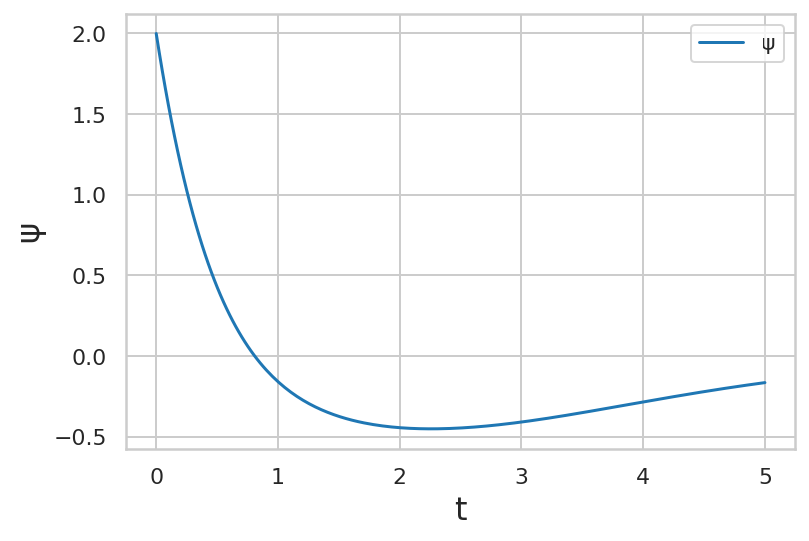

In [58]:
# Plot
y = np.array(list(map(lambda x: x[1], vpsi[0])))
plt.plot(t,y)
plt.xlabel('t')
plt.ylabel('ψ')
plt.legend(('ψ'));

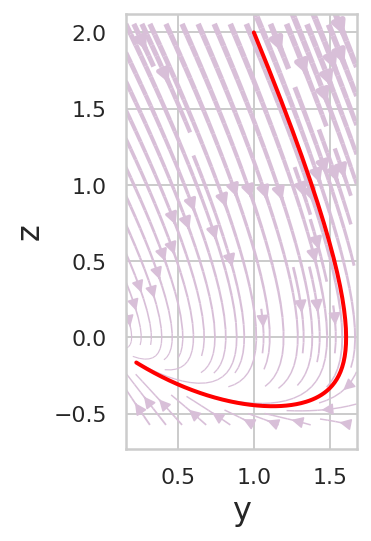

In [59]:
#Phase plane
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_aspect('equal')

ax = plot_traj(ax,pendulum_w_friction, ics, t, args=args, color = 'red')
ax = plot_flow_field(ax, pendulum_w_friction, ax.get_xlim(), ax.get_ylim(), args=args)

### (C) Маятник Фроуда (маятник на вращающемся валу, автоколебания).


In [2]:
psi = sp.symbols('ψ', cls=sp.Function)
t,eps = sp.symbols('t,ε')

$$ \psi^{''} + 2\varepsilon\psi^{'} + (\sin(\psi + \varphi^{*}) - \sin(\varphi^{*})) - p(\psi^{'})^2 + \gamma (\psi^{'})^3 = 0$$
2nd variant is:
$$ x^{''} - (a-b(x^{'})^2)x^{'} + \sin(x) = \mu $$ [click](https://arxiv.org/pdf/1909.01155.pdf)

In [4]:
def Fraude(vpsi, t,eps, p, g, phi):
    v, psi = vpsi
    return np.array([v, -(np.sin(psi+phi)-np.sin(phi))-2*eps*v+p*v**2-g*v**3])

In [29]:
def Fraude2(xy, t, a, b, mu):
    x,y = xy
    return np.array([y, (a-b*y**2)*y - np.sin(x) + mu])

In [151]:
a = 0.36
b = 0.16
mu = 0.01
args = (a,b,mu,)
t = np.linspace(0,30,100)
ic1 = np.array([0.0, 6.0])
ic2 = np.array([0.0, 6.0][::-1])
ic3 = np.array([0.0, 3.0])
ic4 = np.array([2.0, 4.0])
xy = odeint(Fraude2, ic1, t, args = args)
np.arcsin(mu)

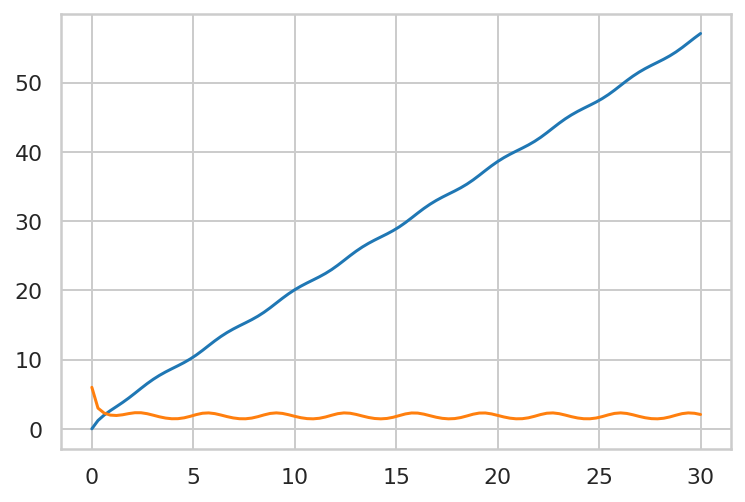

In [87]:
plt.plot(t, xy)

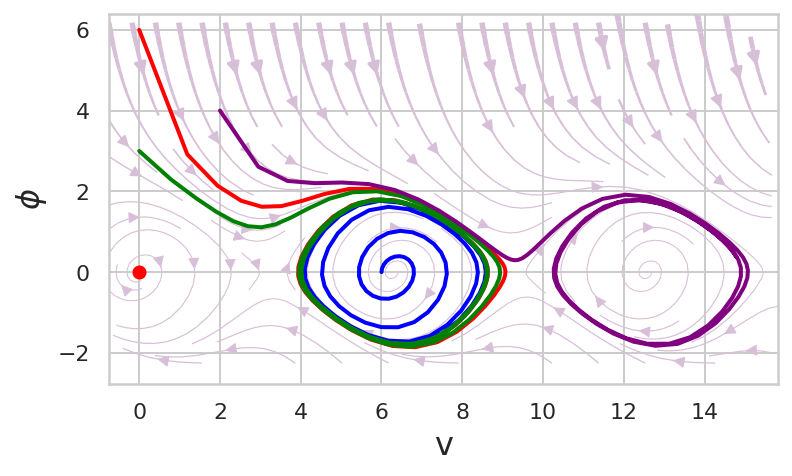

In [152]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('v')
ax.set_ylabel('$\phi$')
ax.set_aspect('equal')

ax = plot_traj(ax,Fraude2, ic1, t, args = args, color = 'red')
ax = plot_traj(ax,Fraude2, ic2, t, args = args, color = 'blue')
ax = plot_traj(ax,Fraude2, ic3, t, args = args, color = 'green')
ax = plot_traj(ax,Fraude2, ic4, t, args = args, color = 'purple')
ax = plot_flow_field(ax, Fraude2, ax.get_xlim(), ax.get_ylim(), args=args)
ax = ax.plot(0,np.arcsin(mu), 'ro')

----------------------------------------------------------

Before substitude:
$$ \phi^{''} + 2\beta\varphi{'} + \omega_0^{2}(\sin(\varphi) - \sin(\varphi^{*})) - p(\varphi^{'})^2 + q(
\varphi^{'})^3 = 0$$

In [145]:
def Froude3(vphi, t, beta, omega, star, p, q):
    v, phi = vphi
    return np.array([v, -2*beta*v - omega**2*(np.sin(phi) - np.sin(star)) + p*v**2 - q*v**3])

In [146]:
beta = -0.1
omega = 2.0
star = np.pi/6
p = 0.016
q = 0.8
args = (beta,omega,star,p,q,)
t = np.linspace(0,30,1000)
ic1 = np.array([0.77, 6.0])
xy = odeint(Froude3, ic1, t, args = args)

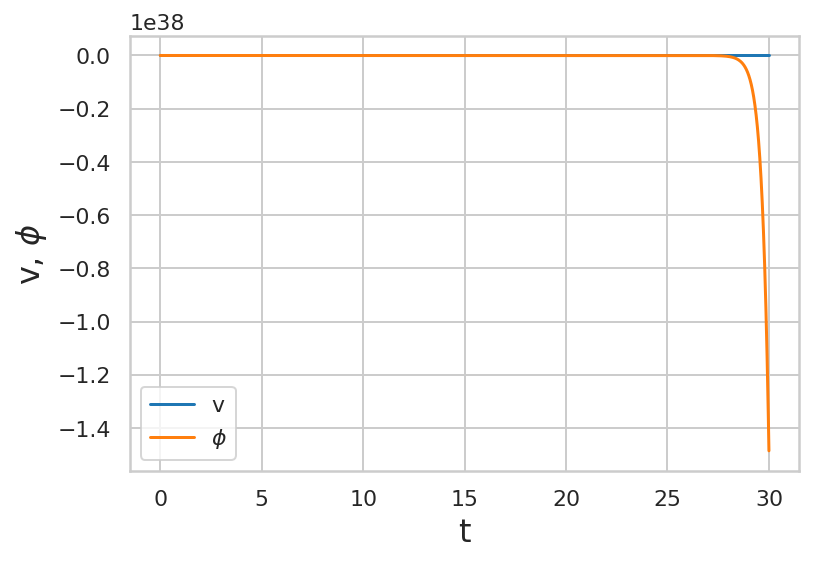

In [147]:
plt.plot(t, xy)
plt.xlabel('t')
plt.ylabel('v, $\phi$')
plt.legend(('v', '$\phi$'));

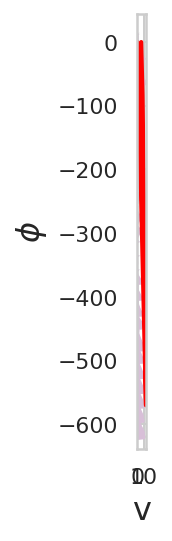

In [141]:
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('v')
ax.set_ylabel('$\phi$')
ax.set_aspect('equal')

ax = plot_traj(ax,Froude3, ic2, t, args = args, color = 'red')
ax = plot_flow_field(ax, Froude3, (-1,2), ax.get_ylim(), args=args)

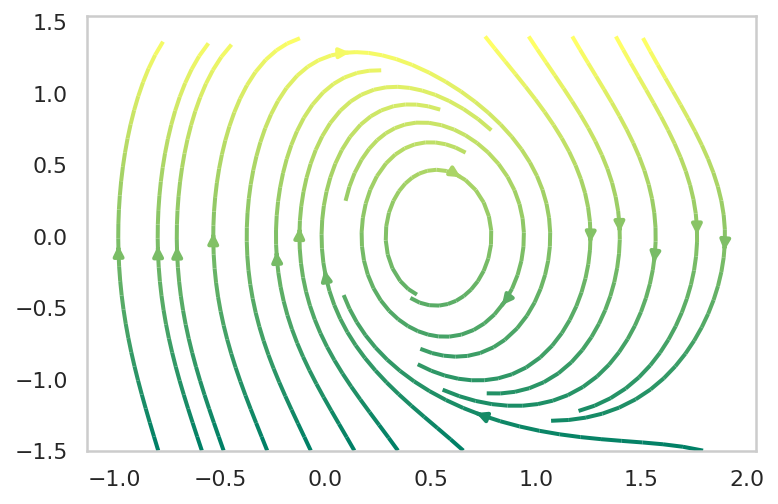

In [150]:
phi, v = np.meshgrid(np.arange(-1, 2, 0.1), np.arange(-1.5, 3/2, 0.1))
psidot = v
vdot = -2*beta*v - omega**2*(np.sin(phi) - np.sin(star)) + p*v**2 - q*v**3

plt.streamplot(phi, v, psidot, vdot, color=psidot, linewidth=2, cmap='summer', minlength = 0.7)
plt.grid(); plt.show()

----------------------------------------------------------

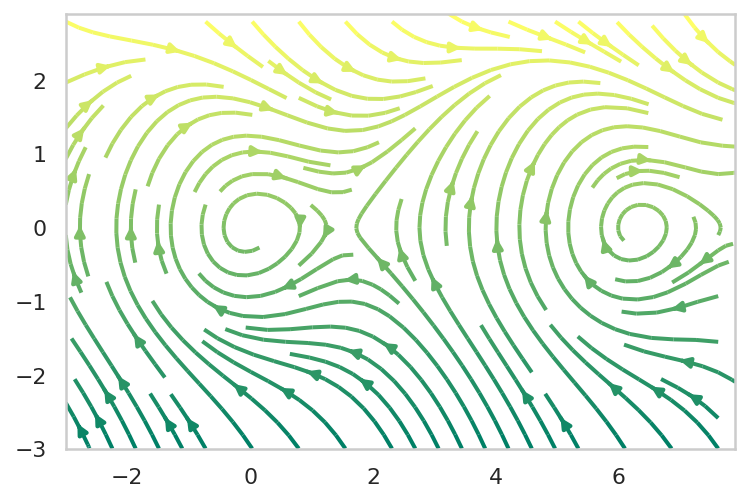

In [41]:
xvalues, yvalues = np.meshgrid(np.arange(-3, 8, 0.1), np.arange(-3, 3, 0.1))
psidot = yvalues
eps = -0.1
p = 0.016
g = 0.16
phi = 0.8
vdot = -(np.sin(xvalues+phi)-np.sin(phi))-2*eps*yvalues+p*yvalues**2-g*yvalues**3
plt.streamplot(xvalues, yvalues, psidot, vdot, color=psidot, linewidth=2, cmap='summer')
plt.grid(); plt.show()

In [109]:
#epsilon argument
args = (eps,p,g,phi)

#Solve
init_cond = np.array([1, 2]) # x'(0)=1 and y'(0)=2
init_cond_1 = np.array([0.2, 0.3]) # x'(0)=2 and y'(0)=3
t = np.linspace(0,60,200)
vphi = odeint(Fraude, init_cond, t, args = args)

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [108]:
# Plot
plt.plot(t, vphi)
plt.xlabel('t')
plt.ylabel('v, $\phi$')
plt.legend(('v', '\phi'));

NameError: name 'vphi' is not defined

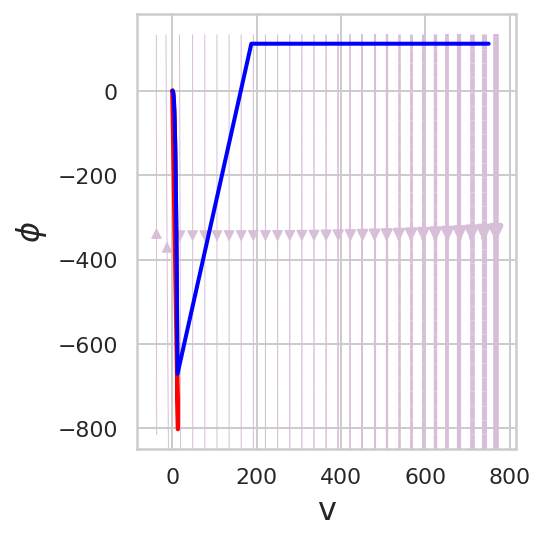

In [108]:
#Phase plane
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('v')
ax.set_ylabel('$\phi$')
ax.set_aspect('equal')

ax = plot_traj(ax,Fraude, init_cond, t, args = args, color = 'red')
ax = plot_traj(ax,Fraude, init_cond_1, t, args = args, color = 'blue')
ax = plot_flow_field(ax, Fraude, ax.get_xlim(), ax.get_ylim(), args=args)